In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Fourier Series
### Odd series approximation for 1, 3, 5,10 harmonics

In [27]:
# Define time period
T = 2 * np.pi
# Define time axis
t = np.linspace(0, T, 1000)
# Define the signal as square wave signal
signal = np.sign(np.sin(t))

In [28]:
# Define Odd fouries series with approximation for certain harmonics
def fourier_series(t, n_terms):
    approx = np.zeros_like(t)
    for n in range(1, n_terms + 1, 2):
        approx += (4 / (np.pi * n)) * np.sin(n * t)

    return approx

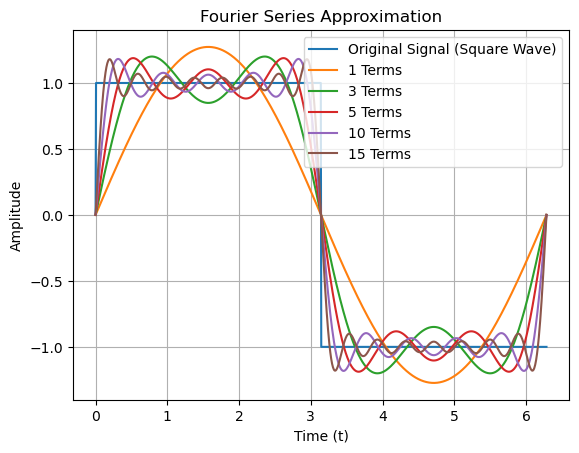

In [30]:
# Plotting
plt.figure()
plt.plot(t, signal, label='Original Signal (Square Wave)')
for n_terms in [1, 3, 5, 10, 15]:
    approx = fourier_series(t, n_terms)
    plt.plot(t, approx, label=f'{n_terms} Terms')
plt.title("Fourier Series Approximation")
plt.xlabel('Time (t)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

# Fouries Transform 
### Approximation

In [31]:
# Define time axis
t = np.linspace(-5, 5, 1000)
# Define signal as Gaussian Pulse
signal = np.exp(-t ** 2)

In [32]:
# Define frequencies range
frequencies = np.fft.fftfreq(len(t), d=(t[1] - t[0]))
# Frequency domain analysis approximation
FT_signal = np.fft.fft(signal)

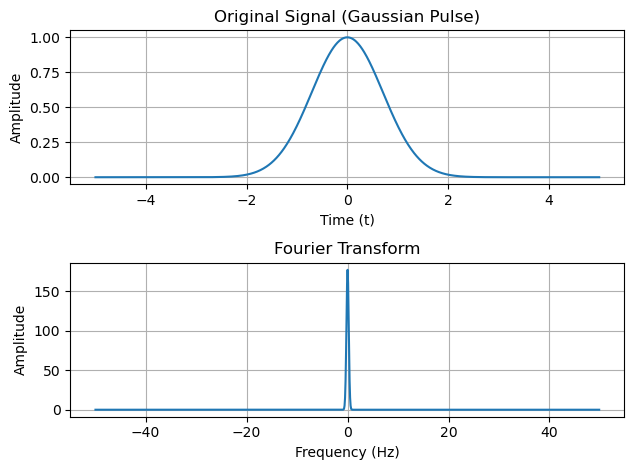

In [33]:
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title('Original Signal (Gaussian Pulse)')
plt.xlabel('Time (t)')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(np.fft.fftshift(frequencies), np.fft.fftshift(np.abs(FT_signal)))
plt.title("Fourier Transform")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid()
plt.tight_layout()
plt.show()

# Discrete-Time Fourier Transform DTFT

In [34]:
# Define time axis (discrete index n)
n = np.arange(0, 10)
# Define signal as sine wave signal
signal = np.sin(2 * np.pi * 0.2 * n)

In [35]:
# Define the frequency range
w = np.linspace(-np.pi, np.pi, 1000)  
# Define the DTFT equation as sum of signal mul by weights
dtft = np.array([np.sum(signal * np.exp(-1j * w_i * n)) for w_i in w])

C:\Users\yasse\AppData\Local\Temp\ipykernel_7752\1067325964.py:4: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(n, signal, use_line_collection=True)


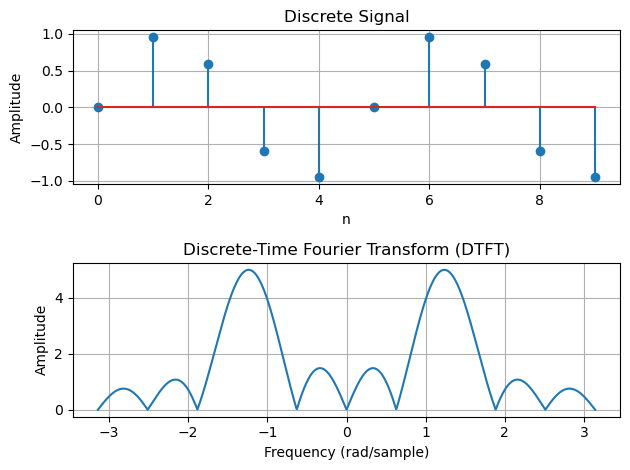

In [36]:
# Plotting
plt.figure()
plt.subplot(2, 1, 1)
plt.stem(n, signal, use_line_collection=True)
plt.title("Discrete Signal")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(w, np.abs(dtft))
plt.title("Discrete-Time Fourier Transform (DTFT)")
plt.xlabel("Frequency (rad/sample)")
plt.ylabel("Amplitude")
plt.grid()
plt.tight_layout()
plt.show()

# Discrete Fourier Transform DFT as FFT

In [37]:
# Number of points
N = 64  
# Define time index n
n = np.arange(0, N)
# Define the signal as discrete sine wave with 5 Hz frequency
signal = np.sin(2 * np.pi * 5 * n / N)

In [38]:
# DFT and FFT computation
dft = np.fft.fft(signal)  # FFT is used as DFT
frequencies = np.fft.fftfreq(N)

C:\Users\yasse\AppData\Local\Temp\ipykernel_7752\2454737676.py:4: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(n, signal, use_line_collection=True)
C:\Users\yasse\AppData\Local\Temp\ipykernel_7752\2454737676.py:11: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(frequencies[:N // 2], np.abs(dft[:N // 2]), use_line_collection=True)


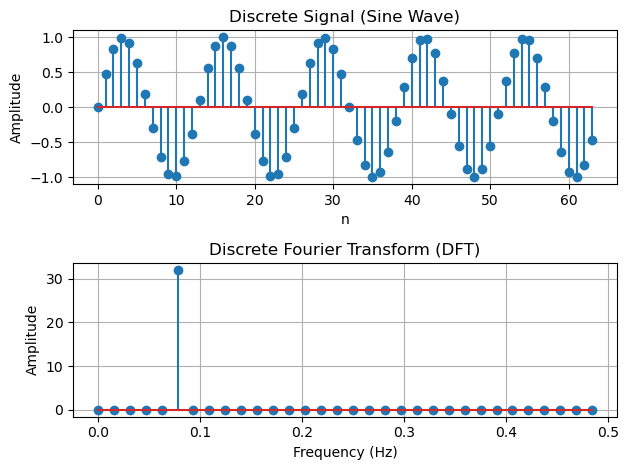

In [39]:
# Plotting
plt.figure()
plt.subplot(2, 1, 1)
plt.stem(n, signal, use_line_collection=True)
plt.title("Discrete Signal (Sine Wave)")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.grid()

plt.subplot(2, 1, 2)
plt.stem(frequencies[:N // 2], np.abs(dft[:N // 2]), use_line_collection=True)
plt.title("Discrete Fourier Transform (DFT)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid()
plt.tight_layout()
plt.show()

# Circular and Linear Convolution using DFT

In [40]:
# Define convultion equation which takes as inputs x signal and h impulse response
def convolution(x, h):
    len_y = len(x) + len(h) - 1 
    y = np.zeros(len_y)

    for n in range(len_y):

        for k in range(len(x)):
            if n-k >= 0 and n - k < len(h):
                y[n] += x[k] * h[n - k]

    return y

In [41]:
# Define input signal x(n)
x = np.array([2, 1, 2, 1])
# Define impulse response h(n)
h = np.array([1, 2, 3, 4])
# Calculate convultion in time domain 
print(f'y = {convolution(x, h)}')

y = [ 2.  5. 10. 16. 12. 11.  4.]


### Using DFT without zero padding

In [42]:
# Calculate frequency components of x
X = np.fft.fft(x)
# Calculate frequency components of h
H = np.fft.fft(h)
# Multiply X by H to have Y
Y = X * H
# Calculate y(n) using inverse DFT
y = np.fft.ifft(Y).real
print(f'X = {X}')
print(f'H = {H}')
print(f'Y = {Y}')
print(f'y = {y}')

X = [6.+0.j 0.+0.j 2.+0.j 0.+0.j]
H = [10.+0.j -2.+2.j -2.+0.j -2.-2.j]
Y = [60.+0.j -0.+0.j -4.+0.j  0.-0.j]
y = [14. 16. 14. 16.]


### Using DFT with zero padding

In [43]:
# Pad input signal with zeros to remove time aliasing
x = np.array([2, 1, 2, 1, 0, 0, 0])
# Pad impulse response with zeros to remove time aliasing
h = np.array([1, 2, 3, 4, 0, 0, 0])

In [44]:
# Calculate frequency components of x
X = np.fft.fft(x)
# Calculate frequency components of h
H = np.fft.fft(h)
# Multiply X by H to have Y
Y = X * H
y = np.fft.ifft(Y).real
print(f'X = {X}')
print(f'H = {H}')
print(f'Y = {Y}')
print(f'y = {y}')

X = [6.        +0.j         1.27747907-3.16557105j 0.59903113+0.67467105j
 2.1234898 +0.15485131j 2.1234898 -0.15485131j 0.59903113-0.67467105j
 1.27747907+3.16557105j]
H = [10.        +0.j         -2.02445867-6.22398166j  0.34601074+2.47912132j
  0.17844793-2.42198468j  0.17844793+2.42198468j  0.34601074-2.47912132j
 -2.02445867+6.22398166j]
Y = [ 60.        +0.j         -22.2886597 -1.54243853j
  -1.46532018+1.71851428j   0.75397988-5.11542687j
   0.75397988+5.11542687j  -1.46532018-1.71851428j
 -22.2886597 +1.54243853j]
y = [ 2.  5. 10. 16. 12. 11.  4.]
